# 自适应引力算法

In [3]:
import numpy as np
import random

In [188]:
particles_dim = 6 #粒子维度
particles_num = 20 #粒子数量
max_iter = 30 #最大迭代次数

particles_UP = np.ones(particles_dim) *10 #粒子上界
particles_DOWN = np.ones(particles_dim) * (-10) #粒子下界



def start(init_particles=None):
    if init_particles is None:
        init_particles = np.zeros((particles_num,particles_dim))
    #初始化
    particles = np.zeros((particles_num,particles_dim))
    for i in range(particles_num):
        for j in range(particles_dim):
            #均匀平铺
            particles[i][j] = init_particles[i][j] + (1+np.random.rand()*0.001)*i*(particles_UP[j] - particles_DOWN[j])/particles_num  + particles_DOWN[j]
            
    return particles

def check(particle):
    #检查单个粒子是否超出边界
    for i in range(particles_dim):
        if particle[i] > particles_UP[i] or particle[i] < particles_DOWN[i]:
            return False
    return True

def fitness(particles):
    #计算所有适应度
    return 0

def cal_distance(particles,i,j):
    #计算所有粒子间距离
    #欧式距离
    return np.sqrt(np.sum(np.square(particles[i] - particles[j])))

def cal_mass(fitnesses,best_fitness, worst_fitness):
    #计算所有质量
    if best_fitness == worst_fitness:
        print("best_fitness == worst_fitness")
    masses = np.zeros(particles_num)
    for i in range(particles_num):
        
        masses[i] = (fitnesses[i] - worst_fitness) / (best_fitness - worst_fitness)
        
    m_sum = np.sum(masses)
    if m_sum == 0:
        return np.ones(particles_num)
    M=np.zeros(particles_num)
    for i in range(particles_num):
        if(masses[i] == 0):
            M[i] = 0.1
        else:
            M[i] = masses[i] / m_sum
        
    return M

def cal_G(alpha,G0,Imax,t):
    #计算引力常数
    return G0 * np.exp(-alpha * t / Imax)

def cal_F(G,M,particles,i,j):
    #计算引力
    F = np.zeros(particles_dim)
    for k in range(particles_dim):
        if(particles[i][k] - particles[j][k] == 0):
            F[k] = 0
        else:
            F[k]= (G * M[i] * M[j]  / (cal_distance(particles,i,j) + 1e-8 ) ) *(particles[j][k] - particles[i][k])#指向j

    if(np.isnan(F).any()):
        print("F:",F,i,j)
    return F

def cal_all_F(G,M,particles,particles_fitness):
    #计算所有粒子受到的引力
    F = np.zeros((particles_num,particles_dim))
    for i in range(particles_num):
        for j in range(particles_num):
            if i != j and ( particles_fitness[i] <= particles_fitness[j] or np.abs(particles_fitness[i] - particles_fitness[j]) < 0.1*particles_fitness[i] ):
                #每个维度随机0-1
                F[i] += cal_F(G,M,particles,i,j) *np.random.rand(particles_dim)
                if(np.isnan(F[i]).any()):
                    print("F[i]:",F[i])
    return F

def cal_all_a(F,M):
    #计算所有粒子加速度
    a = np.zeros((particles_num,particles_dim))
    for i in range(particles_num):
        if M[i] == 0:
            a[i] = 0
        else:
            a[i] = F[i] / M[i]
    return a

def cal_all_v(v,a):
    #计算所有粒子速度
    v = v *np.random.rand(particles_dim) + a
    if(np.isnan(v).any()):
        print("v:",v)
    return v

def cal_all_x(x,v):
    #计算所有粒子位置
    x = x + v
    if(np.isnan(x).any()):
        print("x:",x)
    return x

#自适应部分
#计算离散度,即到群体中心的平均距离
def cal_discrete(particles):
    center = np.zeros(particles_dim)
    for i in range(particles_dim):
        center[i] = np.mean(particles[:,i])
    dis = 0
    for i in range(particles_num):
        for j in range(particles_dim):
            dis += np.square(particles[i][j] - center[j])
    return np.sqrt(dis / particles_num )
    

# alpha
ALPHA_S = 0 #S的值为当R=0.2R0时的alpha
def cal_alpha(R0,R,t):
    global ALPHA_S
    global max_iter
    A = 13
    B = 5
    if(R>=0.6*R0):
        print("第一阶段")
        return A
    if(R>=0.3*R0 and R<0.6*R0):
        print("第二阶段")
        return A+B*(np.cos((t/max_iter)*np.pi + np.pi)+1)
    if(R>=0 and R<0.3*R0):
        print("第三阶段")
        if ALPHA_S == 0:
            ALPHA_S = A+B*(np.cos((t/max_iter)*np.pi + np.pi)+1)
        u=(t*ALPHA_S)/max_iter - ALPHA_S/2
        return A+(B/1+np.exp(-u))

# G0
def cal_G0(t):
    global max_iter
    M = 100
    N=30
    return M+N*(np.cos((t/max_iter)*np.pi)-1)



[0. 0. 0. 0. 0. 0.]
第一阶段
第一阶段
第一阶段
第一阶段
第一阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
第二阶段
最优适应度: -0.00023225242326405427
最优位置: [1.00865328 1.00186454 1.00159739 1.00855489 1.00559116 1.00684819]


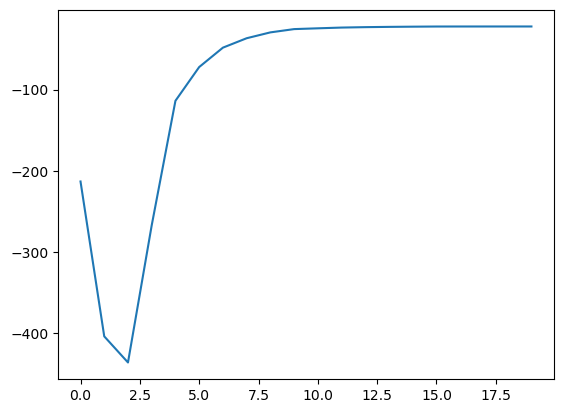

In [187]:
#测试
test_real_min = np.zeros(particles_dim)
print(test_real_min)
def fit_test(x):
    fit= - np.sum(np.square(x-1))
    if  np.isnan(fit):
        print("fit nan",x)
    if np.isinf(fit):
        print("fit inf",x)
        #就报错
        

    return fit
ALPHA_S = 0 
particles = start()
#particles_v = np.random.rand(particles_num, particles_dim)*2 -1#粒子速度
particles_v = np.zeros((particles_num, particles_dim))#粒子速度

#particles_a = np.random.rand(particles_num, particles_dim)*2 -1#粒子加速度
particles_a = np.zeros((particles_num, particles_dim))#粒子加速度
particles_fitness = [fit_test(particles[i]) for i in range(particles_num)]#粒子适应度
particles_best_fitness = np.max(particles_fitness)
particles_best_pos = particles[np.argmax(particles_fitness)]
particles_worst_fitness = np.min(particles_fitness)
particles_worst_pos = particles[np.argmin(particles_fitness)]

particle_history_best_pos = particles_best_pos #全局最优
particle_history_best_fitness = particles_best_fitness #全局最优适应度

#初始离散度
R0 = cal_discrete(particles)

stop_iter = 0
#统计
mean_fitness = np.zeros(max_iter)
for i in range(max_iter):
    
    #计算所有粒子适应度
    particles_fitness = [fit_test(particles[i]) for i in range(particles_num)]
    mean_fitness[i] = np.mean(particles_fitness)
    #print("particles",particles_fitness)
    #计算所有粒子最优
    particles_best_fitness = np.max(particles_fitness)
    #print("particles_best_fitness:",particles_best_fitness)
    particles_best_pos = particles[np.argmax(particles_fitness)]
    if(particles_best_fitness > particle_history_best_fitness):
        particle_history_best_fitness = particles_best_fitness
        particle_history_best_pos = particles_best_pos
        stop_iter = 0
    else:
        stop_iter += 1

    #计算所有粒子最差
    particles_worst_fitness = np.min(particles_fitness)
    #print("particles_worst_fitness:",particles_worst_fitness)
    particles_worst_pos = particles[np.argmin(particles_fitness)]
    #计算所有粒子质量
    particles_mass = cal_mass(particles_fitness,particles_best_fitness,particles_worst_fitness)

    ####
    #自适应部分
    R = cal_discrete(particles)
    #print("R:",R)
    alpha = cal_alpha(R0,R,i)
    #print("alpha:",alpha)
    ####
    #计算引力常数
    particles_G = cal_G(alpha,100,max_iter,i)
    #计算所有粒子受到的引力
    particles_F = cal_all_F(particles_G,particles_mass,particles,particles_fitness)

    #计算所有粒子加速度
    particles_a = cal_all_a(particles_F,particles_mass)
    
    #计算所有粒子速度
    particles_v = cal_all_v(particles_v,particles_a)

    #计算所有粒子位置
    particles = cal_all_x(particles,particles_v)
    
    
    #print(particles_best_pos)
    #停止条件:最优适应度大于阈值,或者全局最优适应度不变一定次数
    #if particles_best_fitness > -0.0001:
    if stop_iter > 100:
        break
print("最优适应度:",particle_history_best_fitness)
print("最优位置:",particle_history_best_pos)
#
import matplotlib.pyplot as plt
plt.plot(mean_fitness)
plt.show()